In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import statsmodels.api as stt
import scipy.stats as sc

In [2]:
df1 = pd.read_excel('tab1.xlsx')
df2 = pd.read_excel('tab2.xlsx')

EDA данных по годам 2007-2010

In [3]:
df1

,Округ,2007,2008,2009,2010
0,Дальневосточный ФО,-,-,-,9637
1,Приволжский ФО,1298570,1267844,1265740,1523781
2,Северо-Западный ФО,2632848,2585767,2531193,2467339
3,Сибирский ФО,43881,41999,36321,89956
4,Уральский ФО,41538,38789,32759,32135
5,Центральный ФО,65477,68592,70714,183875
6,Южный ФО,1558,1038,632,81615
7,Россия,4083872,4004029,3937359,4388338


In [4]:
lst =['Округ','2007','2008','2009','2010']  # Нужно для нормальной читаемости имен.
for i in range(5):
    df1 = df1.rename(columns = {df1.columns[i]:lst[i]})   

In [5]:
df1 = df1.replace({'-': 0})

In [6]:
df1[['2007', '2008', '2009']] = df1[['2007', '2008', '2009']].astype('int64')  # Тип был неверный из-за прочерков "-"

In [7]:
df1_bar = df1.copy()
df1_bar['Бумаги произведено за 2007-2010, т'] = df1_bar.sum(axis=1)  # Всего бумаги по стране
df1_bar = df1_bar[df1_bar['Округ']!='Россия']
df1_bar

,Округ,2007,2008,2009,2010,"Бумаги произведено за 2007-2010, т"
0,Дальневосточный ФО,0,0,0,9637,9637
1,Приволжский ФО,1298570,1267844,1265740,1523781,5355935
2,Северо-Западный ФО,2632848,2585767,2531193,2467339,10217147
3,Сибирский ФО,43881,41999,36321,89956,212157
4,Уральский ФО,41538,38789,32759,32135,145221
5,Центральный ФО,65477,68592,70714,183875,388658
6,Южный ФО,1558,1038,632,81615,84843


Гистограмма распределения

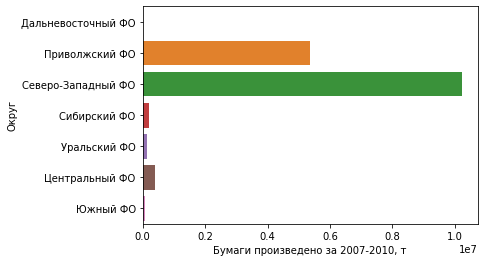

In [8]:
sns.barplot(data=df1_bar, y='Округ', x='Бумаги произведено за 2007-2010, т', orient='h')
plt.show()

Графики производства по годам. Они же для малопродуктивных регионов, чтобы лучше рассмотреть.

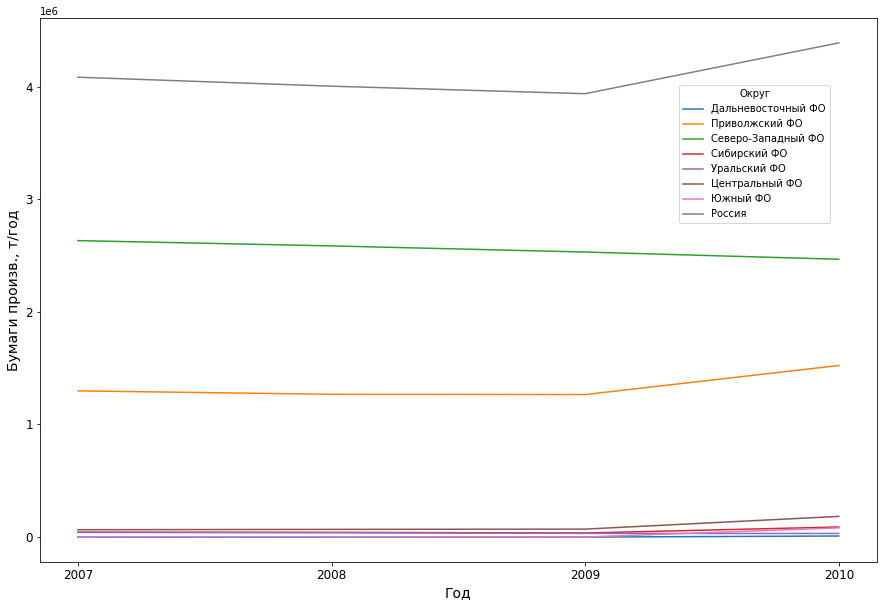

In [9]:
plt.figure(figsize=(15, 10))

df1_cor = df1.copy()
df1_cor = pd.melt(df1_cor, id_vars=['Округ'], value_vars=['2007', '2008', '2009', '2010'],
                  var_name='Год', value_name='Бумаги произв., т/год')
df1_cor['Год'] = df1_cor['Год'].astype('int64')
sns.lineplot(data=df1_cor, x='Год', y='Бумаги произв., т/год', hue='Округ')
plt.legend(title='Округ', loc='right', bbox_to_anchor=(0.95, 0.75))
plt.xlabel('Год', fontsize=14)  
plt.ylabel('Бумаги произв., т/год', fontsize=14)  

plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.show()

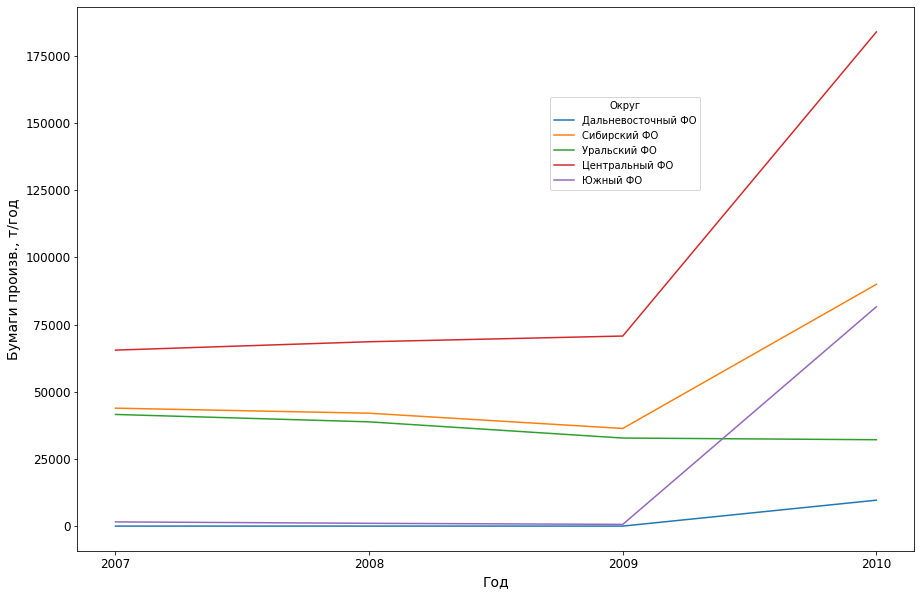

In [10]:
plt.figure(figsize=(15, 10))
df1_cor2 = df1_cor.copy()
# Чтобы получше рассмотртеть отстающие регионы, уберем крупных производителей.
df1_cor2 = df1_cor2[~df1_cor2['Округ'].isin(['Россия', 'Северо-Западный ФО', 'Приволжский ФО'])]   
sns.lineplot(data=df1_cor2, x='Год', y='Бумаги произв., т/год', hue='Округ')
plt.legend(title='Округ', loc='right', bbox_to_anchor=(0.75, 0.75))
plt.xlabel('Год', fontsize=14)  
plt.ylabel('Бумаги произв., т/год', fontsize=14)  
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.show()

In [11]:
tmp_lst=['Дальневосточный ФО','Приволжский ФО','Северо-Западный ФО','Сибирский ФО','Уральский ФО','Центральный ФО','Южный ФО']
for i in tmp_lst:
    print(i, end=': ')
    print(df1_cor[df1_cor['Округ']==i]['Бумаги произв., т/год'].mean(), end=' +_  ')
    print(sc.sem(df1_cor[df1_cor['Округ']==i]['Бумаги произв., т/год'], nan_policy='omit'))

Дальневосточный ФО: 2409.25 +_  2409.25
Приволжский ФО: 1338983.75 +_  62054.281171641705
Северо-Западный ФО: 2554286.75 +_  35655.8885514838
Сибирский ФО: 53039.25 +_  12410.032825466928
Уральский ФО: 36305.25 +_  2300.680347744988
Центральный ФО: 97164.5 +_  28923.49848162678
Южный ФО: 21210.75 +_  20135.641689034066


In [12]:
df2 = pd.read_excel('tab2.xlsx')

In [13]:
lst =['Период','Дальневосточный ФО','Приволжский ФО','Северо-Западный ФО','Сибирский ФО','Уральский ФО','Центральный ФО','Южный ФО']
for i in range(8):
    df2 = df2.rename(columns = {df2.columns[i]:lst[i]})

EDA второй части данных. Помесячное производство в регионах в 2010 и части 2011 года.

In [14]:
df2 = df2.replace({'-': np.nan})
df2['Дальневосточный ФО'] = df2['Дальневосточный ФО'].astype('int64', errors='ignore')
df2['Период'] = pd.to_datetime(df2['Период'])
display(df2)
df2_unp = pd.melt(df2, id_vars = 'Период',var_name = 'Округ' ,value_name = 'Бумаги произв., т')

,Период,Дальневосточный ФО,Приволжский ФО,Северо-Западный ФО,Сибирский ФО,Уральский ФО,Центральный ФО,Южный ФО
0,2010-01-01,NaN,125942,225270,9012,1974,10295,5275
1,2010-02-01,715.0,115983,205186,10142,1958,9644,5077
2,2010-03-01,785.0,131567,231567,12002,2868,14377,5957
3,2010-04-01,NaN,123864,222248,3553,3033,15196,5880
4,2010-05-01,1542.0,125808,229416,12348,3885,9800,6731
5,2010-06-01,795.0,129071,218227,2848,1849,14456,6955
6,2010-07-01,712.0,134215,237862,2733,1981,15109,7437
7,2010-08-01,979.0,134642,218438,2819,2509,13901,7373
8,2010-09-01,2147.0,123453,230194,2767,2929,14613,7642
9,2010-10-01,483.0,126390,242567,9601,3243,16476,6362


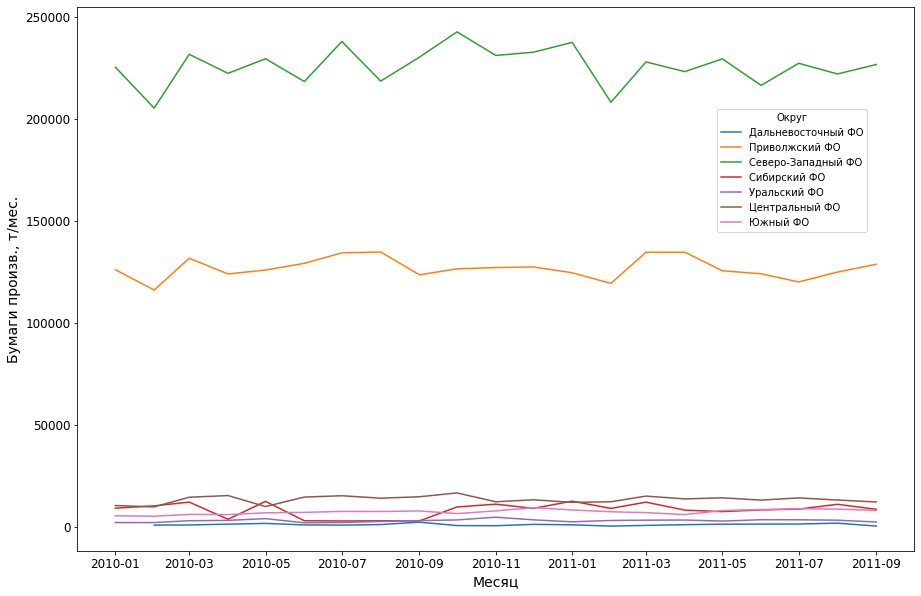

In [15]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df2_unp, x='Период', y='Бумаги произв., т', hue='Округ')

plt.legend(title='Округ', loc='right', bbox_to_anchor=(0.95, 0.7))
plt.xlabel('Месяц', fontsize=14)  
plt.ylabel('Бумаги произв., т/мес.', fontsize=14)  

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.show()

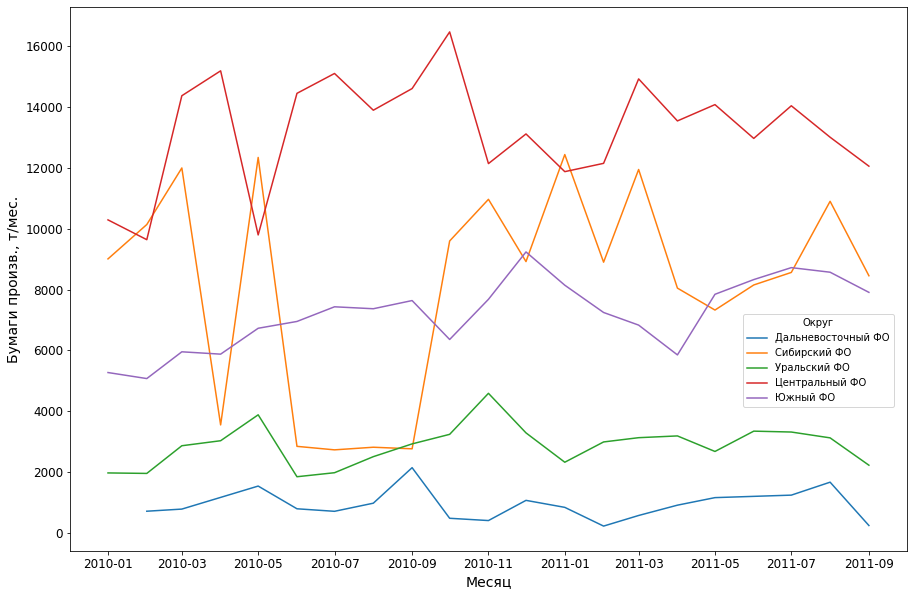

In [16]:
plt.figure(figsize=(15, 10))

sns.lineplot(data=df2_unp[~df2_unp['Округ'].isin(['Северо-Западный ФО', 'Приволжский ФО'])], x='Период', \
             y='Бумаги произв., т', hue='Округ')
plt.legend(title='Округ', loc='right', bbox_to_anchor=(0.99, 0.35))
plt.xlabel('Месяц', fontsize=14)  
plt.ylabel('Бумаги произв., т/мес.', fontsize=14)


plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.show()

Рассчитаем slope для каждого региона и его стандартное отклонение

In [17]:
df2_unp2010 = df2_unp.copy()[df2_unp['Период'].dt.year==2010]
df2_unp2011 = df2_unp.copy()[df2_unp['Период'].dt.year==2011]
met2010 = {}
met2011 = {}

for i in range(1,len(lst)):
    met1 = []
    met2 = []
    x1 = df2_unp2010[df2_unp2010['Округ']==lst[i]]['Период'].dt.month
    x2 = df2_unp2011[df2_unp2011['Округ']==lst[i]]['Период'].dt.month
    
    x1 = stt.add_constant(x1)
    x2 = stt.add_constant(x2)
    
    y1 = df2_unp2010[df2_unp2010['Округ']==lst[i]]['Бумаги произв., т']
    y2 = df2_unp2011[df2_unp2011['Округ']==lst[i]]['Бумаги произв., т']
    
    met1.append(round(y1.mean(),2))
    met1.append(round(sc.sem(y1, nan_policy='omit')))
    met2.append(round(y2.mean(),2))
    met2.append(round(sc.sem(y2, nan_policy='omit')))
    
    model1 = stt.OLS(y1, x1, missing='drop').fit()
    model2 = stt.OLS(y2, x2, missing='drop').fit()
    
    met1.append(round(model1.params[1]))  # Угол наклона (коэффициент для x)
    met1.append(round(model1.bse[1]))  # Стандартная ошибка для угла наклона
    met2.append(round(model2.params[1]))  # Угол наклона (коэффициент для x)
    met2.append(round(model2.bse[1]))  # Стандартная ошибка для угла наклона
        
    met2010[lst[i]] = met1
    met2011[lst[i]] = met2

dfm11 = pd.DataFrame(data=met2011, index=['mean','mean_std','coef','coef_std'])
print('2011')
display(dfm11)

2011


,Дальневосточный ФО,Приволжский ФО,Северо-Западный ФО,Сибирский ФО,Уральский ФО,Центральный ФО,Южный ФО
mean,859.75,126171.33,224205.33,9418.44,2927.22,13188.33,7719.78
mean_std,177.00,1838.00,2781.00,618.00,139.00,350.00,308.00
coef,55.00,-108.00,-165.00,-277.00,9.00,16.00,155.00
coef_std,67.00,760.00,1150.00,234.00,58.00,145.00,113.00


In [18]:
dfm10 = pd.DataFrame(data=met2010, index=['mean','mean_std','coef','coef_std'])
print(2010)
display(dfm10)

2010


,Дальневосточный ФО,Приволжский ФО,Северо-Западный ФО,Сибирский ФО,Уральский ФО,Центральный ФО,Южный ФО
mean,963.8,127103.67,227051.75,7310.0,2842.67,13261.17,6801.08
mean_std,166.0,1462.00,2882.00,1153.0,245.00,660.00,340.00
coef,2.0,376.00,1457.00,-150.0,127.00,274.00,284.00
coef_std,56.0,428.00,745.00,347.0,63.00,181.00,51.00


Расчитаем корреляционную матрицу

In [19]:
df_mat = df2.copy()
df_mat = df_mat.drop(columns=['Период'])
df_mat
correlation_matrix = df2.corr(method='pearson')

print(correlation_matrix)

                    Дальневосточный ФО  Приволжский ФО  Северо-Западный ФО  \
Дальневосточный ФО            1.000000       -0.147867            0.105990   
Приволжский ФО               -0.147867        1.000000            0.399432   
Северо-Западный ФО            0.105990        0.399432            1.000000   
Сибирский ФО                 -0.195963       -0.184765            0.127321   
Уральский ФО                  0.133001       -0.047840            0.202495   
Центральный ФО                0.008132        0.423133            0.410549   
Южный ФО                      0.274450       -0.053094            0.237814   

                    Сибирский ФО  Уральский ФО  Центральный ФО  Южный ФО  
Дальневосточный ФО     -0.195963      0.133001        0.008132  0.274450  
Приволжский ФО         -0.184765     -0.047840        0.423133 -0.053094  
Северо-Западный ФО      0.127321      0.202495        0.410549  0.237814  
Сибирский ФО            1.000000      0.392462       -0.459990 -0.015090  


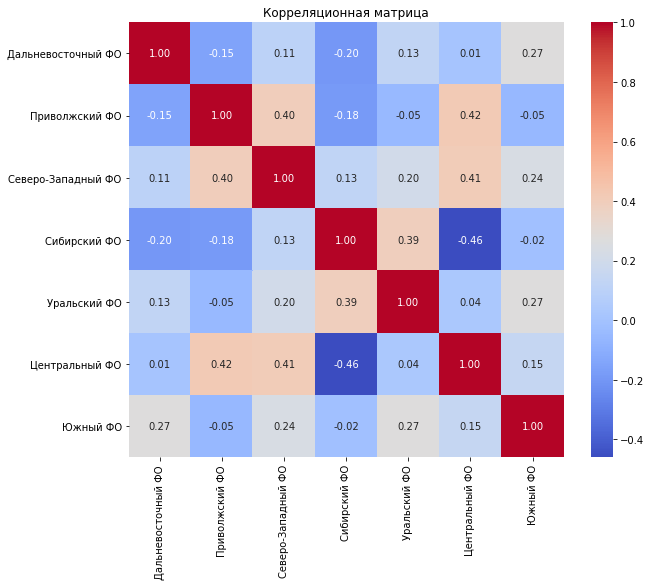

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

С выводами можно ознакомиться в pdf версии отчета